In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.model_selection import train_test_split
data = pd.read_csv('video_games_sales.csv', index_col=0)

In [2]:
data

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16719 entries, Wii Sports to Winning Post 8 2016
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16719 non-null  object 
 1   Year_of_Release  16450 non-null  float64
 2   Genre            16717 non-null  object 
 3   Publisher        16665 non-null  object 
 4   NA_Sales         16719 non-null  float64
 5   EU_Sales         16719 non-null  float64
 6   JP_Sales         16719 non-null  float64
 7   Other_Sales      16719 non-null  float64
 8   Global_Sales     16719 non-null  float64
 9   Critic_Score     8137 non-null   float64
 10  Critic_Count     8137 non-null   float64
 11  User_Score       10015 non-null  object 
 12  User_Count       7590 non-null   float64
 13  Developer        10096 non-null  object 
 14  Rating           9950 non-null   object 
dtypes: float64(9), object(6)
memory usage: 2.0+ MB


In [4]:
data.isnull().sum()

Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
data.dropna(axis = 0)

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
Name,,,,,,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M


<AxesSubplot:>

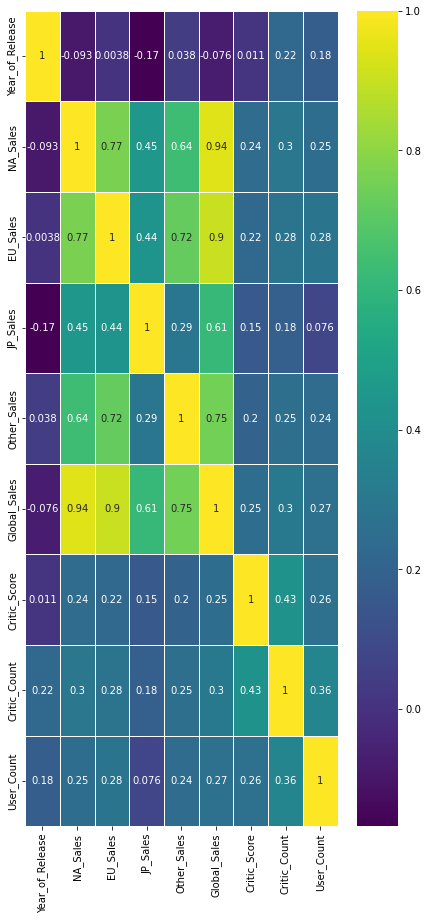

In [9]:
plt.figure(figsize=(7,15))
sns.heatmap(data.corr(),annot=True,cmap='viridis', linewidth=0.5)

In [10]:
data['Platform'].value_counts

<bound method IndexOpsMixin.value_counts of Name
Wii Sports                        Wii
Super Mario Bros.                 NES
Mario Kart Wii                    Wii
Wii Sports Resort                 Wii
Pokemon Red/Pokemon Blue           GB
                                 ... 
Samurai Warriors: Sanada Maru     PS3
LMA Manager 2007                 X360
Haitaka no Psychedelica           PSV
Spirits & Spells                  GBA
Winning Post 8 2016               PSV
Name: Platform, Length: 16719, dtype: object>

xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(train_X, train_y)
  
# Predict the model
pred = xgb_r.predict(test_X)
  

In [53]:
x_columns = ['NA_Sales','EU_Sales' ,'JP_Sales','Other_Sales']
df = data.dropna(axis=0)
X = pd.DataFrame(df,columns=['NA_Sales','EU_Sales' ,'JP_Sales','Critic_Score','Critic_Count','User_Score','User_Count'])
y = df.Other_Sales

In [54]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Name,,,,,,,
Wii Sports,41.36,28.96,3.77,76.0,51.0,8,322.0
Mario Kart Wii,15.68,12.76,3.79,82.0,73.0,8.3,709.0
Wii Sports Resort,15.61,10.93,3.28,80.0,73.0,8,192.0
New Super Mario Bros.,11.28,9.14,6.50,89.0,65.0,8.5,431.0
Wii Play,13.96,9.18,2.93,58.0,41.0,6.6,129.0


In [55]:
X['User_Score'] = X['User_Score'].astype(float)

In [56]:
X.head()

,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Name,,,,,,,
Wii Sports,41.36,28.96,3.77,76.0,51.0,8.0,322.0
Mario Kart Wii,15.68,12.76,3.79,82.0,73.0,8.3,709.0
Wii Sports Resort,15.61,10.93,3.28,80.0,73.0,8.0,192.0
New Super Mario Bros.,11.28,9.14,6.50,89.0,65.0,8.5,431.0
Wii Play,13.96,9.18,2.93,58.0,41.0,6.6,129.0


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6825 entries, Wii Sports to STORM: Frontline Nation
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NA_Sales      6825 non-null   float64
 1   EU_Sales      6825 non-null   float64
 2   JP_Sales      6825 non-null   float64
 3   Critic_Score  6825 non-null   float64
 4   Critic_Count  6825 non-null   float64
 5   User_Score    6825 non-null   float64
 6   User_Count    6825 non-null   float64
dtypes: float64(7)
memory usage: 426.6+ KB


In [58]:
y.head()

Name
Wii Sports               8.45
Mario Kart Wii           3.29
Wii Sports Resort        2.95
New Super Mario Bros.    2.88
Wii Play                 2.84
Name: Other_Sales, dtype: float64

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5118, 7)
(1707, 7)
(5118,)
(1707,)


In [60]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
  
# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
pred = xgb_r.predict(X_test)
pred

[13:45:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


array([0.44026995, 0.0522859 , 0.03160155, ..., 0.02041719, 0.02929869,
       0.03487531], dtype=float32)

In [61]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  0.096181


An rmse of 0.233 shows that the model is quite accurate using the xgboost linear regression algorithm

In [51]:
lr = LinearRegression()

In [62]:
lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, pred_lr))
print("RMSE : % f" %(rmse))
print(lr.score(X_train,y_train))

RMSE :  0.112686
0.5511257982199601


In [70]:
from sklearn.metrics import r2_score
scores= r2_score(y_test,pred)
print(scores)

0.7510197107741134


In [71]:
scores= r2_score(y_test,pred_lr)
print(scores)

0.6582403556463484


In [72]:
import joblib
joblib.dump(xgb_r, 'videogame_sale_model.pkl')

['videogame_sale_model.pkl']